In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
csv_data = pd.read_csv('StudentsPerformance.csv')

In [3]:
csv_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
csv_data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [5]:
df = csv_data.copy() # Create a copy

In [6]:
'''
male = df[csv_data.gender == 'male']
female = df[csv_data.gender == 'female']
male.groupby('gender').mean()
female.groupby('gender').mean()
'''

"\nmale = df[csv_data.gender == 'male']\nfemale = df[csv_data.gender == 'female']\nmale.groupby('gender').mean()\nfemale.groupby('gender').mean()\n"

In [7]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df_mean = df.groupby("gender").agg([np.mean, np.std])

In [10]:
df_mean

math score            reading score            writing score           
             mean        std          mean        std          mean        std
gender                                                                        
female  63.633205  15.491453     72.608108  14.378245     72.467181  14.844842
male    68.728216  14.356277     65.473029  13.931832     63.311203  14.113832

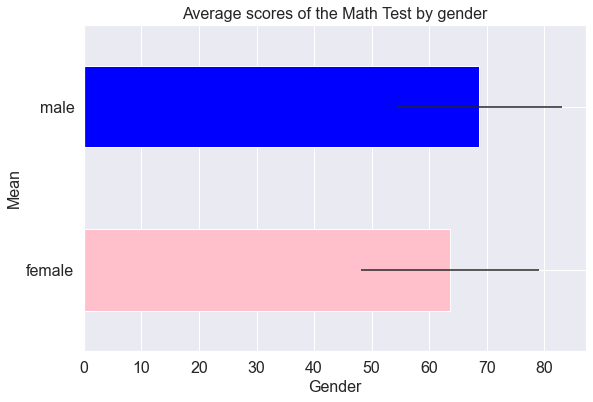

In [11]:
sns.set_style("darkgrid")
df_mean['math score'].plot(kind = 'barh', y = 'mean', legend = False, color = ['pink', 'blue'],figsize=(9, 6),fontsize = 16,xerr='std')
plt.title("Average scores of the Math Test by gender",fontsize = 16)
plt.xlabel("Gender",fontsize = 16)
plt.ylabel("Mean",fontsize = 16)
plt.xticks(rotation=0)
plt.show()


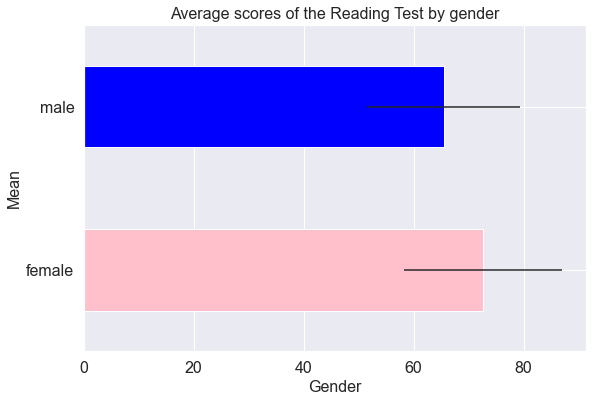

In [12]:
sns.set_style("darkgrid")
df_mean['reading score'].plot(kind = 'barh', y = 'mean', legend = False, color = ['pink', 'blue'],figsize=(9, 6),fontsize = 16,xerr='std')
plt.title("Average scores of the Reading Test by gender",fontsize = 16)
plt.xlabel("Gender",fontsize = 16)
plt.ylabel("Mean",fontsize = 16)
plt.xticks(rotation=0)
plt.show()

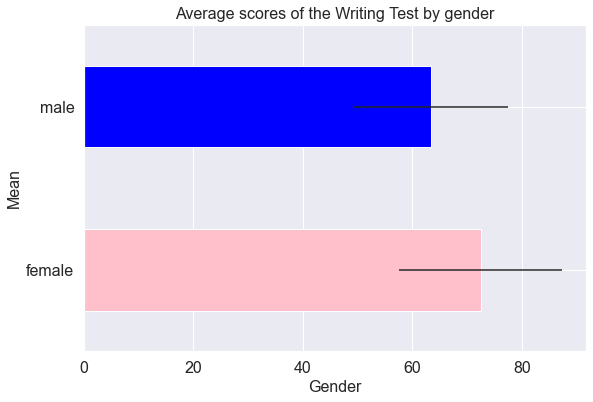

In [13]:
sns.set_style("darkgrid")
df_mean['writing score'].plot(kind = 'barh', y = 'mean', legend = False, color = ['pink', 'blue'],figsize=(9, 6),fontsize = 16,xerr='std')
plt.title("Average scores of the Writing Test by gender",fontsize = 16)
plt.xlabel("Gender",fontsize = 16)
plt.ylabel("Mean",fontsize = 16)
plt.xticks(rotation=0)
plt.show()


### Create correlation between race and the scores

In [14]:
df.columns = df.columns.str.replace(' ', '_')

In [15]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
score_mean = df.groupby(['race/ethnicity']).mean()

In [17]:
score_mean = score_mean.reset_index()

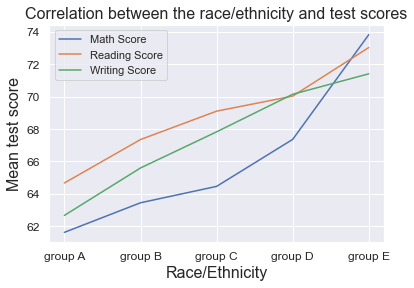

<Figure size 864x432 with 0 Axes>

In [18]:
plt.plot(df.groupby(['race/ethnicity']).mean())
sns.set_style("darkgrid")
plt.legend(['Math Score','Reading Score','Writing Score'])
plt.title("Correlation between the race/ethnicity and test scores",fontsize = 16)
plt.xlabel("Race/Ethnicity",fontsize = 16)
plt.ylabel("Mean test score",fontsize = 16)
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.figure(figsize=(12,6))
plt.rcParams['figure.figsize'] = (9,5)
plt.show()


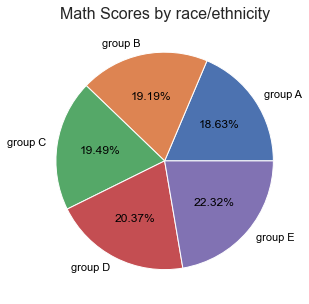

In [19]:
plt.pie(score_mean['math_score'],
       labels = score_mean['race/ethnicity'].values,
       autopct = '%.2f%%',
        textprops = {
            'color' : 'black',     
        }
       )
plt.title('Math Scores by race/ethnicity', fontsize = '16')
plt.show()


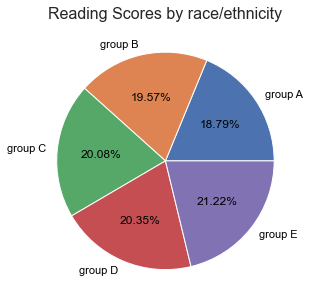

In [20]:
plt.pie(score_mean['reading_score'],
       labels = score_mean['race/ethnicity'].values,
       autopct = '%.2f%%',
        textprops = {
            'color' : 'black',     
        }
       )
plt.title('Reading Scores by race/ethnicity', fontsize = '16')
plt.show()

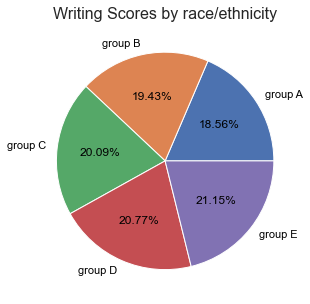

In [21]:
plt.pie(score_mean['writing_score'],
       labels = score_mean['race/ethnicity'].values,
       autopct = '%.2f%%',
        textprops = {
            'color' : 'black',     
        }
       )
plt.title('Writing Scores by race/ethnicity', fontsize = '16')
plt.show()

In [22]:
score_mean['total'] = score_mean['math_score']+score_mean['reading_score']+score_mean['writing_score']
score_mean

,race/ethnicity,math_score,reading_score,writing_score,total
0,group A,61.629213,64.674157,62.674157,188.977528
1,group B,63.452632,67.352632,65.600000,196.405263
2,group C,64.463950,69.103448,67.827586,201.394984
3,group D,67.362595,70.030534,70.145038,207.538168
4,group E,73.821429,73.028571,71.407143,218.257143


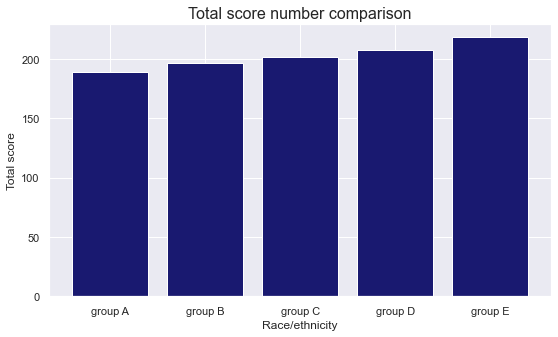

In [23]:
plt.bar(x = score_mean['race/ethnicity'],
       height = score_mean['total'], 
        color = 'midnightblue')
plt.title('Total score number comparison', fontsize = '16')
plt.xlabel("Race/ethnicity")
plt.ylabel("Total score")
plt.xticks(rotation=0)
plt.show()

### Does having free/reduced lunch correlate with the test scores?

In [24]:
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [43]:
lunch_mean = df.groupby(df['lunch']).mean()
lunch_mean = lunch_mean.reset_index()
lunch_mean # People with free/reduced lunch averages a lower score than those with standard lunch!

,lunch,math_score,reading_score,writing_score
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


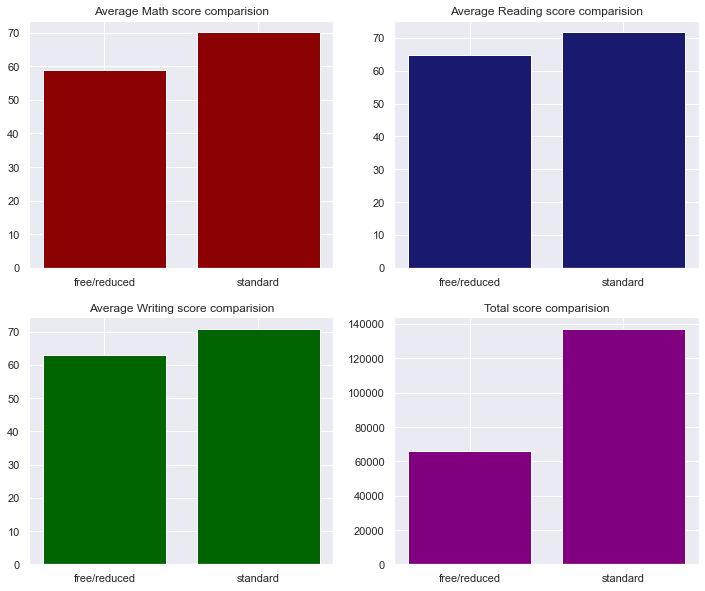

In [87]:
fig, axes = plt.subplots(2,2, figsize = (12,10))
axes[0,0].bar(x = lunch_mean['lunch'],
             height = lunch_mean['math_score'],
             color = 'darkred')
axes[0,0].set_title("Average Math score comparision")
axes[0,1].bar(x = lunch_mean['lunch'],
             height = lunch_mean['reading_score'],
             color = 'midnightblue')
axes[0,1].set_title("Average Reading score comparision")
axes[1,0].bar(x = lunch_mean['lunch'],
             height = lunch_mean['writing_score'],
             color = 'darkgreen')
axes[1,0].set_title("Average Writing score comparision")
axes[1,1].bar(x = lunch_mean['lunch'],
             height = lunch_sum['total'],
             color = 'purple')
axes[1,1].set_title("Total score comparision")
plt.show()

In [79]:
lunch_sum =  df.groupby(df['lunch']).sum()

In [80]:
lunch_sum['total'] = lunch_sum['math_score'] + lunch_sum['reading_score'] + lunch_sum['writing_score']

In [81]:
lunch_sum

,math_score,reading_score,writing_score,total
lunch,,,,
free/reduced,20917,22952,22373,66242
standard,45172,46217,45681,137070
